In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Cargamos datos

In [3]:
data = pd.read_csv('data/retiros.csv', sep=';')

In [4]:
data.head(3)

,CEDULA_ANONIMIZADA,FECHA,CODIGO_EMPRESA,ID_GENERO,ID_ESTADO_CIVIL,FECHA_NACIMIENTO,EDAD,CODIGO_LOCALIDAD,TIPO_NOMINA,FECHA_INGRESO,...,PORCENTAJE_RIESGO,SALARIO,COMPENSACION_VARIABLE,PORCENT_COMP_VARIABLE,TOTAL_SALARIO,UBICACION_ANONIMIZADA,FECHA FIN CONTRATO,CAUSA NOMBRE,TIPO DE RETIRO,RETIRO
0,50,31/12/2017,21,F,SOLTERO,14/08/1998,22,999999,NO DEFINIDO,1/06/2017,...,999999.0,737717,0.0,0,737717.0,7,31/12/2040,NO APLICA,NO APLICA,0
1,158,31/12/2017,21,F,SOLTERO,21/08/1997,23,999999,NO DEFINIDO,16/06/2017,...,999999.0,737717,0.0,0,737717.0,7,31/12/2040,NO APLICA,NO APLICA,0
2,215,31/12/2017,21,M,SOLTERO,12/04/1999,21,999999,NO DEFINIDO,19/04/2017,...,999999.0,737717,0.0,0,737717.0,7,31/12/2040,NO APLICA,NO APLICA,0


## Preparación del modelo

In [5]:
print(data.shape)
print(list(data.columns))

(1579, 31)
['CEDULA_ANONIMIZADA', 'FECHA', 'CODIGO_EMPRESA', 'ID_GENERO', 'ID_ESTADO_CIVIL', 'FECHA_NACIMIENTO', 'EDAD', 'CODIGO_LOCALIDAD', 'TIPO_NOMINA', 'FECHA_INGRESO', 'FECHA_INICIO_CONTRATO', 'ID_CARGO', 'TIPO_CARGO', 'NIVEL_CARGO', 'CATEGORIA_CARGO', 'TIPO_AREA', 'ID_CENTRO_COSTO', 'SENAL_SINDICALIZADO', 'CLASE_EMPLEADO', 'CLASE_NOMINA', 'SUBSIDIO_TRANSPORTE', 'PORCENTAJE_RIESGO', 'SALARIO', 'COMPENSACION_VARIABLE', 'PORCENT_COMP_VARIABLE', 'TOTAL_SALARIO', 'UBICACION_ANONIMIZADA', 'FECHA FIN CONTRATO', 'CAUSA NOMBRE', 'TIPO DE RETIRO', 'RETIRO']


In [6]:
data_final = data[['CEDULA_ANONIMIZADA', 'CODIGO_EMPRESA', 'ID_GENERO', 
                   'ID_ESTADO_CIVIL', 'EDAD', 'CODIGO_LOCALIDAD', 'TIPO_NOMINA', 
                   'ID_CARGO', 'TIPO_CARGO', 'NIVEL_CARGO', 'ID_CENTRO_COSTO', 
                   'SENAL_SINDICALIZADO', 'CLASE_EMPLEADO', 'CLASE_NOMINA',
                   'SUBSIDIO_TRANSPORTE',
                   'COMPENSACION_VARIABLE', 'PORCENT_COMP_VARIABLE', 'TOTAL_SALARIO',
                   'CAUSA NOMBRE', 'TIPO DE RETIRO', 'RETIRO']]

In [7]:
data_final.head()

,CEDULA_ANONIMIZADA,CODIGO_EMPRESA,ID_GENERO,ID_ESTADO_CIVIL,EDAD,CODIGO_LOCALIDAD,TIPO_NOMINA,ID_CARGO,TIPO_CARGO,NIVEL_CARGO,...,SENAL_SINDICALIZADO,CLASE_EMPLEADO,CLASE_NOMINA,SUBSIDIO_TRANSPORTE,COMPENSACION_VARIABLE,PORCENT_COMP_VARIABLE,TOTAL_SALARIO,CAUSA NOMBRE,TIPO DE RETIRO,RETIRO
0,50,21,F,SOLTERO,22,999999,NO DEFINIDO,999999,SOPORTE,7,...,N,NO DEFINIDO,0,N,0.0,0,737717.0,NO APLICA,NO APLICA,0
1,158,21,F,SOLTERO,23,999999,NO DEFINIDO,999999,SOPORTE,7,...,N,NO DEFINIDO,0,N,0.0,0,737717.0,NO APLICA,NO APLICA,0
2,215,21,M,SOLTERO,21,999999,NO DEFINIDO,999999,SOPORTE,7,...,N,NO DEFINIDO,0,N,0.0,0,737717.0,NO APLICA,NO APLICA,0
3,279,21,F,SOLTERO,25,999999,NO DEFINIDO,999999,SOPORTE,7,...,N,NO DEFINIDO,0,N,0.0,0,1475434.0,NO APLICA,NO APLICA,0
4,319,21,F,SOLTERO,26,999999,NO DEFINIDO,999999,SOPORTE,7,...,N,NO DEFINIDO,0,N,0.0,0,1475434.0,NO APLICA,NO APLICA,0


In [8]:
data_final["COMPENSACION_VARIABLE"] = pd.to_numeric(data_final["COMPENSACION_VARIABLE"])
data_final["TOTAL_SALARIO"] = pd.to_numeric(data_final["TOTAL_SALARIO"])

### Factorización de datos

Convertimos a valores numéricos los datos categóricos.

In [9]:
data_final['ID_GENERO'].value_counts()

M    1087
F     492
Name: ID_GENERO, dtype: int64

In [10]:
data_final.loc[data_final['ID_GENERO']== 'M', 'ID_GENERO'] = 0
data_final.loc[data_final['ID_GENERO']== 'F', 'ID_GENERO'] = 1

In [11]:
data_final['ID_ESTADO_CIVIL'].value_counts()

CASADO         683
SOLTERO        678
UNION LIBRE    172
DIVORCIADO      20
NO DEFINIDO     18
SEPARADO         8
Name: ID_ESTADO_CIVIL, dtype: int64

In [12]:
data_final.loc[data_final['ID_ESTADO_CIVIL']== 'CASADO', 'ID_ESTADO_CIVIL'] = 0
data_final.loc[data_final['ID_ESTADO_CIVIL']== 'SOLTERO', 'ID_ESTADO_CIVIL'] = 1
data_final.loc[data_final['ID_ESTADO_CIVIL']== 'UNION LIBRE', 'ID_ESTADO_CIVIL'] = 2
data_final.loc[data_final['ID_ESTADO_CIVIL']== 'DIVORCIADO', 'ID_ESTADO_CIVIL'] = 3
data_final.loc[data_final['ID_ESTADO_CIVIL']== 'NO DEFINIDO', 'ID_ESTADO_CIVIL'] = 4
data_final.loc[data_final['ID_ESTADO_CIVIL']== 'SEPARADO', 'ID_ESTADO_CIVIL'] = 5

In [13]:
data_final['TIPO_NOMINA'].value_counts()

LEY 50 NOMINAL TERMINO INDEFIN    1097
LEY 50 NOMINAL TERMINO FIJO        303
LEY 50 INTEGRAL                    147
NO DEFINIDO                         28
LEY TRADICIONAL NOMINAL              4
Name: TIPO_NOMINA, dtype: int64

In [14]:
data_final.loc[data_final['TIPO_NOMINA']== 'LEY 50 NOMINAL TERMINO INDEFIN', 'TIPO_NOMINA'] = 0
data_final.loc[data_final['TIPO_NOMINA']== 'LEY 50 NOMINAL TERMINO FIJO', 'TIPO_NOMINA'] = 1
data_final.loc[data_final['TIPO_NOMINA']== 'LEY 50 INTEGRAL', 'TIPO_NOMINA'] = 2
data_final.loc[data_final['TIPO_NOMINA']== 'NO DEFINIDO', 'TIPO_NOMINA'] = 3
data_final.loc[data_final['TIPO_NOMINA']== 'NO LEY TRADICIONAL NOMINAL', 'TIPO_NOMINA'] = 4
data_final.loc[data_final['TIPO_NOMINA']== 'LEY TRADICIONAL NOMINAL', 'TIPO_NOMINA'] = 5

In [15]:
data_final['TIPO_CARGO'].value_counts()

DIRECCION                           622
ADMINISTRATIVO                      442
SOPORTE                             178
ADMINISTRATIVO PLANTA               174
COMERCIAL                            74
CLAVE                                69
GERENCIAL                            17
BECARIOS / APRENDICES / PASANTES      2
PLANTA                                1
Name: TIPO_CARGO, dtype: int64

In [16]:
data_final.loc[data_final['TIPO_CARGO']== 'DIRECCION', 'TIPO_CARGO'] = 0
data_final.loc[data_final['TIPO_CARGO']== 'ADMINISTRATIVO', 'TIPO_CARGO'] = 1
data_final.loc[data_final['TIPO_CARGO']== 'SOPORTE', 'TIPO_CARGO'] = 2
data_final.loc[data_final['TIPO_CARGO']== 'ADMINISTRATIVO PLANTA', 'TIPO_CARGO'] = 3
data_final.loc[data_final['TIPO_CARGO']== 'COMERCIAL', 'TIPO_CARGO'] = 4
data_final.loc[data_final['TIPO_CARGO']== 'CLAVE', 'TIPO_CARGO'] = 5
data_final.loc[data_final['TIPO_CARGO']== 'GERENCIAL', 'TIPO_CARGO'] = 6
data_final.loc[data_final['TIPO_CARGO']== 'BECARIOS / APRENDICES / PASANTES', 'TIPO_CARGO'] = 7
data_final.loc[data_final['TIPO_CARGO']== 'PLANTA', 'TIPO_CARGO'] = 8

In [17]:
data_final['SUBSIDIO_TRANSPORTE'].value_counts()

S    1552
N      27
Name: SUBSIDIO_TRANSPORTE, dtype: int64

In [18]:
data_final.loc[data_final['SUBSIDIO_TRANSPORTE']== 'S', 'SUBSIDIO_TRANSPORTE'] = 1
data_final.loc[data_final['SUBSIDIO_TRANSPORTE']== 'N', 'SUBSIDIO_TRANSPORTE'] = 0

In [19]:
data_final['CAUSA NOMBRE'].value_counts()

NO APLICA                        1203
RETIRO VOLUNTARIO                 169
MUTUO ACUERDO                      88
DESPIDO SIN JUSTA CAUSA            54
VENCIMIENTO DE CONTRATO            31
RENUNCIA VOLUNTARIA                11
DESPIDO CON JUSTA CAUSA            10
TERMINACION UNILATERAL              8
TERMINACION PERIODO DE PRUEBA       4
PERIODO DE PRUEBA                   1
Name: CAUSA NOMBRE, dtype: int64

In [20]:
data_final.loc[data_final['CAUSA NOMBRE']== 'NO APLICA', 'CAUSA NOMBRE'] = 0
data_final.loc[data_final['CAUSA NOMBRE']== 'RETIRO VOLUNTARIO', 'CAUSA NOMBRE'] = 1
data_final.loc[data_final['CAUSA NOMBRE']== 'MUTUO ACUERDO', 'CAUSA NOMBRE'] = 2
data_final.loc[data_final['CAUSA NOMBRE']== 'DESPIDO SIN JUSTA CAUSA', 'CAUSA NOMBRE'] = 3
data_final.loc[data_final['CAUSA NOMBRE']== 'VENCIMIENTO DE CONTRATO', 'CAUSA NOMBRE'] = 4
data_final.loc[data_final['CAUSA NOMBRE']== 'RENUNCIA VOLUNTARIA', 'CAUSA NOMBRE'] = 5
data_final.loc[data_final['CAUSA NOMBRE']== 'DESPIDO CON JUSTA CAUSA', 'CAUSA NOMBRE'] = 6
data_final.loc[data_final['CAUSA NOMBRE']== 'TERMINACION UNILATERAL'] = 7
data_final.loc[data_final['CAUSA NOMBRE']== 'TERMINACION PERIODO DE PRUEBA', 'CAUSA NOMBRE'] = 8
data_final.loc[data_final['CAUSA NOMBRE']== 'PERIODO DE PRUEBA', 'CAUSA NOMBRE'] = 9

In [21]:
data_final['TIPO DE RETIRO'].value_counts()

NO APLICA     1228
NO DESEADO     183
DESEADO        160
7                8
Name: TIPO DE RETIRO, dtype: int64

In [22]:
data_final.loc[data_final['TIPO DE RETIRO']== 'NO APLICA', 'TIPO DE RETIRO'] = 0
data_final.loc[data_final['TIPO DE RETIRO']== 'NO DESEADO', 'TIPO DE RETIRO'] = 1
data_final.loc[data_final['TIPO DE RETIRO']== 'DESEADO', 'TIPO DE RETIRO'] = 2

In [23]:
data_final['SENAL_SINDICALIZADO'].value_counts()
# 'SENAL_SINDICALIZADO', 'CLASE_EMPLEADO'

N    1462
S     108
7       8
C       1
Name: SENAL_SINDICALIZADO, dtype: int64

In [24]:
data_final.loc[data_final['SENAL_SINDICALIZADO']== 'N', 'SENAL_SINDICALIZADO'] = 0
data_final.loc[data_final['SENAL_SINDICALIZADO']== 'S', 'SENAL_SINDICALIZADO'] = 1
data_final.loc[data_final['SENAL_SINDICALIZADO']== '7', 'SENAL_SINDICALIZADO'] = 2
data_final.loc[data_final['SENAL_SINDICALIZADO']== 'C', 'SENAL_SINDICALIZADO'] = 2

In [25]:
data_final['CLASE_EMPLEADO'].value_counts()

NO DEFINIDO               1163
DIRECTOS DE PRODUCCION     170
ADMINISTRACION CENTRAL     150
DIRECTOS DE VENTAS          88
7                            8
Name: CLASE_EMPLEADO, dtype: int64

In [26]:
data_final.loc[data_final['CLASE_EMPLEADO']== 'NO DEFINIDO', 'CLASE_EMPLEADO'] = 0
data_final.loc[data_final['CLASE_EMPLEADO']== 'DIRECTOS DE PRODUCCION', 'CLASE_EMPLEADO'] = 1
data_final.loc[data_final['CLASE_EMPLEADO']== 'ADMINISTRACION CENTRAL', 'CLASE_EMPLEADO'] = 2
data_final.loc[data_final['CLASE_EMPLEADO']== 'DIRECTOS DE VENTAS', 'CLASE_EMPLEADO'] = 2

## División de datos en entrenamiento y pruebas

In [27]:
from sklearn.model_selection import train_test_split 

y = data_final.RETIRO
X = data_final.drop('RETIRO', axis=1)

# Division de datos en 70:30  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
print("type(y_train):", type(y_train))
print("Número de registros en el dataset X_train: ", X_train.shape) 
print("Número de registros en el dataset y_train: ", y_train.shape) 
print("Número de registros en el dataset X_test: ", X_test.shape) 
print("Número de registros en el dataset y_test: ", y_test.shape)

type(y_train): <class 'pandas.core.series.Series'>
Número de registros en el dataset X_train:  (1105, 20)
Número de registros en el dataset y_train:  (1105,)
Número de registros en el dataset X_test:  (474, 20)
Número de registros en el dataset y_test:  (474,)


## Sobre - Muestreo y balanceo de datos

In [28]:
print("Antes del sobre-muestreo, contador etiqueta 'Retiro': {}".format(sum(data_final.RETIRO == 1))) 
print("Antes del sobre-muestreo, contador etiqueta 'No Retiro': {} \n".format(sum(data_final.RETIRO  == 0)))

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('Despues del sobre-muestreo, la forma de x_train es: {}'.format(X_train_res.shape)) 
print('Despues del sobre-muestreo, la forma de y_train es: {} \n'.format(y_train_res.shape)) 
print("Despues del sobre-muestreo, contador etiqueta 'Retiro': {}".format(sum(y_train_res == 1))) 
print("Despues del sobre-muestreo, contador etiqueta 'No Retiro': {}".format(sum(y_train_res == 0)))

Antes del sobre-muestreo, contador etiqueta 'Retiro': 368
Antes del sobre-muestreo, contador etiqueta 'No Retiro': 1203 

Despues del sobre-muestreo, la forma de x_train es: (2520, 20)
Despues del sobre-muestreo, la forma de y_train es: (2520,) 

Despues del sobre-muestreo, contador etiqueta 'Retiro': 840
Despues del sobre-muestreo, contador etiqueta 'No Retiro': 840


In [29]:
columnas_finales = X_train_res.columns
os_data_X = pd.DataFrame(data = X_train_res, columns = columnas_finales)
os_data_y = pd.DataFrame(data = y_train_res, columns=['RETIRO'])
X = os_data_X[columnas_finales]
y = os_data_y['RETIRO']

## Modelado Arbol de desición

In [34]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(200.88000000000002, 181.2, 'X[12] <= 4.5\ngini = 0.667\nsamples = 2520\nvalue = [840, 840, 840]'),
 Text(133.92000000000002, 108.72, 'X[18] <= 0.5\ngini = 0.5\nsamples = 1680\nvalue = [840, 840, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 840\nvalue = [840, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 840\nvalue = [0, 840, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 840\nvalue = [0, 0, 840]')]

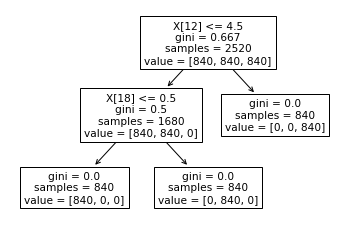

In [35]:
tree.plot_tree(clf)